In [1]:
import pandas as pd

In [2]:
traderdata = pd.read_csv(r"C:\Users\singh\New folder (3)\DS ANISH SINGH\csv_files\historical_data.csv")
sentimentdata = pd.read_csv(r"C:\Users\singh\New folder (3)\DS ANISH SINGH\csv_files\fear_greed_index.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\singh\\New folder (3)\\DS ANISH SINGH\\csv_files\\historical_data.csv'

In [ ]:
print("Trader Data:")
traderdata.info()

print("\nSentiment Data:")
sentimentdata.info()

Trader Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool

In [ ]:
print("\nMissing values in Trader Data:")
print(traderdata.isnull().sum())

print("\nMissing values in Sentiment Data:")
print(sentimentdata.isnull().sum())


Missing values in Trader Data:
Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

Missing values in Sentiment Data:
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [ ]:
traderdata["Timestamp IST"] = pd.to_datetime(traderdata["Timestamp IST"], errors="coerce")
sentimentdata["date"] = pd.to_datetime(sentimentdata["date"], errors="coerce")

In [ ]:
print("\nTrader Data Date Range:", traderdata["Timestamp IST"].min(), "to", traderdata["Timestamp IST"].max())
print("Sentiment Data Date Range:", sentimentdata["date"].min(), "to", sentimentdata["date"].max())


Trader Data Date Range: 2023-01-05 01:06:00 to 2025-12-04 23:55:00
Sentiment Data Date Range: 2018-02-01 00:00:00 to 2025-05-02 00:00:00


In [ ]:
traderdata.head(), sentimentdata.head()

(                                      Account  Coin  Execution Price  \
 0  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9769   
 1  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9800   
 2  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9855   
 3  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9874   
 4  0xae5eacaf9c6b9111fd53034a602c192a04e082ed  @107           7.9894   
 
    Size Tokens  Size USD Side       Timestamp IST  Start Position Direction  \
 0       986.87   7872.16  BUY 2024-02-12 22:50:00        0.000000       Buy   
 1        16.00    127.68  BUY 2024-02-12 22:50:00      986.524596       Buy   
 2       144.09   1150.63  BUY 2024-02-12 22:50:00     1002.518996       Buy   
 3       142.98   1142.04  BUY 2024-02-12 22:50:00     1146.558564       Buy   
 4         8.73     69.75  BUY 2024-02-12 22:50:00     1289.488521       Buy   
 
    Closed PnL                                   Transaction Hash     Order ID

In [ ]:
traderdata["date"] = traderdata["Timestamp IST"].dt.date
traderdata["date"] = pd.to_datetime(traderdata["date"])

In [ ]:
dailytrader = traderdata.groupby("date").agg({
    "Account": "count",                # Number of trades
    "Size USD": "sum",                  # Total volume
    "Start Position": "mean",           # Avg leverage proxy
    "Closed PnL": "mean"                 # Avg profit/loss
}).reset_index()

dailytrader.rename(columns={
    "Account": "total_trades",
    "Size USD": "total_volume_usd",
    "Start Position": "avg_start_position",
    "Closed PnL": "avg_closed_pnl"
}, inplace=True)

In [ ]:
mergeddata = pd.merge(dailytrader, sentimentdata[["date", "classification"]], on="date", how="inner")

In [ ]:
mergeddata.head()

,date,total_trades,total_volume_usd,avg_start_position,avg_closed_pnl,classification
0,2023-01-05,3,477.00,0.091933,0.000000,Fear
1,2023-05-12,9,50005.83,2.513867,0.000000,Neutral
2,2024-01-01,18,264239.53,414.773256,-7.196192,Greed
3,2024-01-02,6,2008.18,18562.666667,0.000000,Greed
4,2024-01-03,137,472974.70,375587.745255,60.176945,Greed


In [ ]:
import os

# create folder if it does not exist
os.makedirs("csvfiles", exist_ok=True)

# save merged data
mergeddata.to_csv("csvfiles/mergeddata.csv", index=False)

# create outputs folder
os.makedirs("outputs", exist_ok=True)

In [ ]:
mergeddata.to_csv("csvfiles/mergeddata.csv", index=False)

In [ ]:
import os
os.makedirs("outputs", exist_ok=True)

In [ ]:
# Rename columns to remove underscores
mergeddata.columns = mergeddata.columns.str.replace("_", "").str.lower()

# Check updated column names
print(mergeddata.columns)


Index(['date', 'totaltrades', 'totalvolumeusd', 'avgstartposition',
       'avgclosedpnl', 'classification'],
      dtype='object')


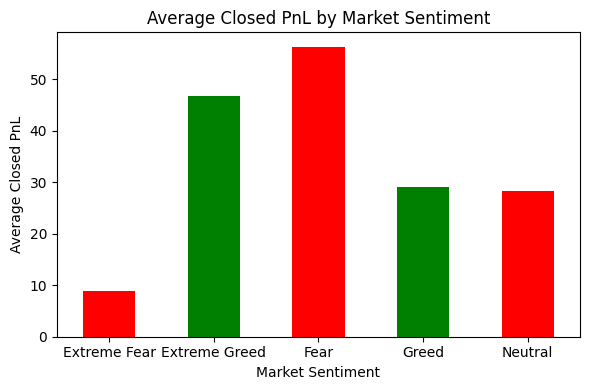

In [ ]:
import matplotlib.pyplot as plt

avgpnl = mergeddata.groupby("classification")["avgclosedpnl"].mean()

plt.figure(figsize=(6,4))
avgpnl.plot(kind="bar", color=["red", "green"])
plt.title("Average Closed PnL by Market Sentiment")
plt.ylabel("Average Closed PnL")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("outputs/avgpnl_by_sentiment.png")
plt.show()

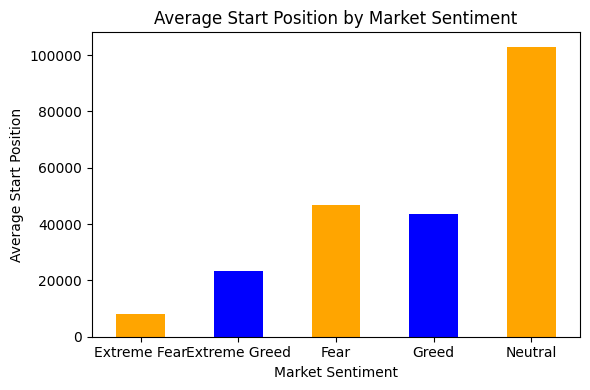

In [ ]:
avgstartposition = mergeddata.groupby("classification")["avgstartposition"].mean()

plt.figure(figsize=(6,4))
avgstartposition.plot(kind="bar", color=["orange", "blue"])
plt.title("Average Start Position by Market Sentiment")
plt.ylabel("Average Start Position")
plt.xlabel("Market Sentiment")
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("outputs/avgstartposition_by_sentiment.png")
plt.show()

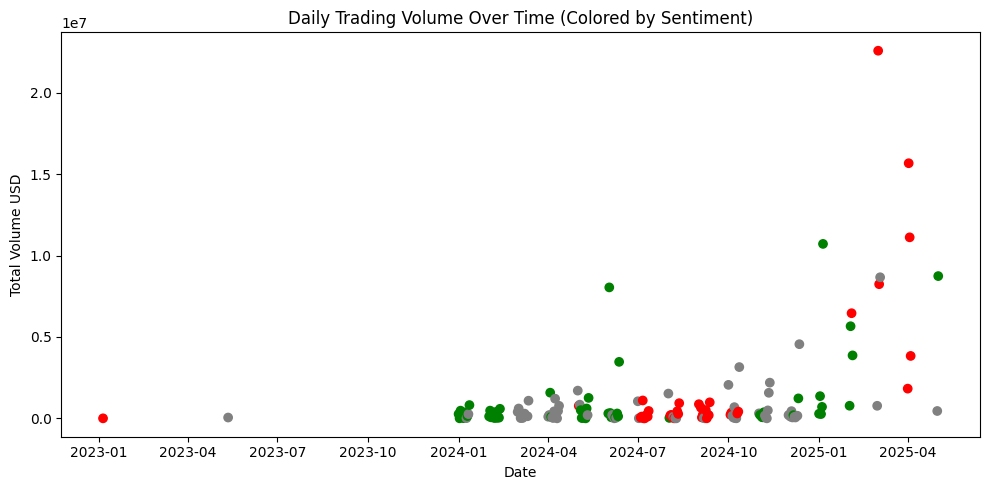

In [ ]:
colors = mergeddata["classification"].map({"Fear": "red", "Greed": "green"})

# Fill missing sentiment colors with gray
colors = colors.fillna("gray")

plt.figure(figsize=(10,5))
plt.scatter(mergeddata["date"], mergeddata["totalvolumeusd"], c=colors)
plt.title("Daily Trading Volume Over Time (Colored by Sentiment)")
plt.ylabel("Total Volume USD")
plt.xlabel("Date")
plt.tight_layout()
plt.savefig("outputs/tradingvolume_over_time.png")
plt.show()


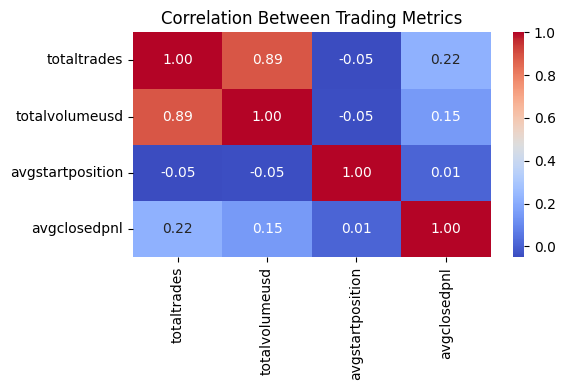

In [ ]:
import seaborn as sns

corr = mergeddata[["totaltrades", "totalvolumeusd", "avgstartposition", "avgclosedpnl"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Trading Metrics")
plt.tight_layout()
plt.savefig("outputs/correlation_heatmap.png")
plt.show()